In [1]:
# key libs
import numpy as np
import re
import nltk
import pandas as pd
import glob
import codecs

# nlp libs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# processing
from sklearn.model_selection import train_test_split

# textblob wrapper
from textblob import TextBlob
from nltk.tokenize import sent_tokenize


In [2]:
# set random state
RSEED =0

In [3]:
train_list = pd.read_csv('../data/train_file_list.csv')
test_list = pd.read_csv('../data/test_file_list.csv')
train_list = train_list.drop(columns ='Unnamed: 0')
test_list = test_list.drop(columns ='Unnamed: 0')

In [24]:
#train_list.head()
test_list.head()

,index,file_extension,title,author
0,480,../data/gutenberg/George Bernard Shaw___Great ...,Great Catherine,George Bernard Shaw
1,2319,../data/gutenberg/William Wymark Jacobs___Shor...,Short Cruises,William Wymark Jacobs
2,2491,../data/gutenberg/Edward Stratemeyer___Richard...,Richard Dare's Venture,Edward Stratemeyer
3,1191,../data/gutenberg/Thomas Henry Huxley___Willia...,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley
4,572,../data/gutenberg/John Galsworthy___Beyond.txt,Beyond,John Galsworthy


In [5]:
test_list.shape

(607, 4)

In [6]:
train_files = list(train_list['file_extension'])
test_files = list(test_list['file_extension'])

### 1. SENTIMENT ANALYSIS ON TRAIN
Just use a pre-trained black box

In [29]:
sentiment_train = []
for file_link in train_files:
    file=open(file_link)
    t=file.read()
    book = TextBlob(t)
    word_count = len(book.words)
    sentence_count =len(book.sentences)
    avg_len = word_count/sentence_count
    sentiment_train.append([word_count,sentence_count,avg_len,book.sentiment[0],book.sentiment[1]])
    print(file_link,'--done--')           

../data/gutenberg/Stephen Leacock___Behind the Beyond.txt --done--
../data/gutenberg/Jerome Klapka Jerome___Tommy and Co.txt --done--
../data/gutenberg/Stephen Leacock___Winsome Winnie and other New Nonsense Novels.txt --done--
../data/gutenberg/Hamlin Garland___The Moccasin Ranch.txt --done--
../data/gutenberg/Charles Dickens___Three Ghost Stories.txt --done--
../data/gutenberg/P G Wodehouse___The Man with Two Left Feet.txt --done--
../data/gutenberg/Herbert Spencer___Essays: Scientific, Political, & Speculative, Volume I.txt --done--
../data/gutenberg/William Dean Howells___The Lady of the Aroostook.txt --done--
../data/gutenberg/Edgar Rice Burroughs___Tarzan the Untamed.txt --done--
../data/gutenberg/Jerome Klapka Jerome___Diary of a Pilgrimage.txt --done--
../data/gutenberg/Lyman Frank Baum___Rinkitink in Oz.txt --done--
../data/gutenberg/Sir Arthur Conan Doyle___The Great Keinplatz Experiment and Other Tales of Twilight and the Unseen.txt --done--
../data/gutenberg/Charles Darwin_

../data/gutenberg/Herbert George Wells___Certain Personal Matters.txt --done--
../data/gutenberg/William Dean Howells___Dr. Breen's Practice.txt --done--
../data/gutenberg/P G Wodehouse___Death At The Excelsior.txt --done--
../data/gutenberg/Thomas Henry Huxley___Lay Sermons, Addresses and Reviews.txt --done--
../data/gutenberg/Thomas Carlyle___Sartor Resartus.txt --done--
../data/gutenberg/Robert Louis Stevenson___The Works of Robert Louis Stevenson - Swanston Edition, Volume 22.txt --done--
../data/gutenberg/Charles Dickens___Going into Society.txt --done--
../data/gutenberg/Harold Bindloss___For the Allinson Honor.txt --done--
../data/gutenberg/Washington Irving___Bracebridge Hall, or The Humorists.txt --done--
../data/gutenberg/John Stuart Mill___Autobiography.txt --done--
../data/gutenberg/Benjamin Disraeli___Ixion In Heaven.txt --done--
../data/gutenberg/Robert Louis Stevenson___Underwoods.txt --done--
../data/gutenberg/Sir Walter Scott___The Dramatic Works of John Dryden, Volume

../data/gutenberg/Jacob Abbott___Pyrrhus.txt --done--
../data/gutenberg/John Dryden___The Poetical Works of John Dryden, Volume 1.txt --done--
../data/gutenberg/Bret Harte___Complete Poetical Works of Bret Harte.txt --done--
../data/gutenberg/Herbert George Wells___The History of Mr. Polly.txt --done--
../data/gutenberg/William Makepeace Thackeray___John Leech's Pictures of Life and Character.txt --done--
../data/gutenberg/William Makepeace Thackeray___The Wolves and the Lamb.txt --done--
../data/gutenberg/Edmund Burke___The Works of the Right Honourable Edmund Burke, Vol. 09 (of 12).txt --done--
../data/gutenberg/Charlotte Mary Yonge___Unknown to History.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Time's Portraiture.txt --done--
../data/gutenberg/Sir Arthur Conan Doyle___The Adventure of the Red Circle.txt --done--
../data/gutenberg/Rafael Sabatini___The Historical Nights' Entertainment, First Series.txt --done--
../data/gutenberg/George Bernard Shaw___Man And Superman.txt --

../data/gutenberg/R M Ballantyne___Blue Lights.txt --done--
../data/gutenberg/William Wymark Jacobs___Fine Feathers, Ship's Company, Part 1.txt --done--
../data/gutenberg/William Butler Yeats___Mosada.txt --done--
../data/gutenberg/Henry James___Pandora.txt --done--
../data/gutenberg/R M Ballantyne___The Butterfly's Ball.txt --done--
../data/gutenberg/Oscar Wilde___Poems.txt --done--
../data/gutenberg/Frank Richard Stockton___What Might Have Been Expected.txt --done--
../data/gutenberg/James Otis___The Minute Boys of York Town.txt --done--
../data/gutenberg/William Wymark Jacobs___Sam's Ghost, Deep Waters, Part 4.txt --done--
../data/gutenberg/Percival Lowell___Noto, An Unexplored Corner of Japan.txt --done--
../data/gutenberg/John Galsworthy___The Island Pharisees.txt --done--
../data/gutenberg/Bret Harte___Openings in the Old Trail.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Beneath an Umbrella (From "Twice Told Tales").txt --done--
../data/gutenberg/William Wymark Jacobs___

../data/gutenberg/Sir Arthur Conan Doyle___The Tragedy of The Korosko.txt --done--
../data/gutenberg/Rafael Sabatini___The Historical Nights' Entertainment, Second Series.txt --done--
../data/gutenberg/Thomas Carlyle___History of Friedrich II of Prussia, Volume 2.txt --done--
../data/gutenberg/Charlotte Mary Yonge___My Young Alcides.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Doctor Grimshawe's Secret.txt --done--
../data/gutenberg/Edgar Allan Poe___Eureka.txt --done--
../data/gutenberg/Robert Louis Stevenson___A Child's Garden of Verses, Verse 142.txt --done--
../data/gutenberg/Frank Richard Stockton___The Magic Egg and Other Stories.txt --done--
../data/gutenberg/Jack London___Stories of Ships and the Sea.txt --done--
../data/gutenberg/Lyman Frank Baum___Aunt Jane's Nieces at Work.txt --done--
../data/gutenberg/Zane Grey___The Rainbow Trail.txt --done--
../data/gutenberg/Robert Louis Stevenson___Prince Otto.txt --done--
../data/gutenberg/Rudyard Kipling___The Light That Fail

../data/gutenberg/Herbert George Wells___Boon, The Mind of the Race, The Wild Asses of the Devil, and The Last Trump.txt --done--
../data/gutenberg/William Wymark Jacobs___Three at Table, The Lady of the Barge and Others, Part 12.txt --done--
../data/gutenberg/John Galsworthy___Tatterdemalion.txt --done--
../data/gutenberg/P B Shelley___A Vindication of Natural Diet.txt --done--
../data/gutenberg/John Ruskin___Giotto and his works in Padua.txt --done--
../data/gutenberg/G K Chesterton___What's Wrong With The World.txt --done--
../data/gutenberg/George Alfred Henty___Dorothy's Double, Volume 1.txt --done--
../data/gutenberg/Herbert Spencer___The Right To Ignore The State.txt --done--
../data/gutenberg/Charles Dickens___Sketches of Young Couples.txt --done--
../data/gutenberg/Robert Louis Stevenson___Songs of Travel.txt --done--
../data/gutenberg/P G Wodehouse___A Prefect's Uncle.txt --done--
../data/gutenberg/O Henry___Cabbages and Kings.txt --done--
../data/gutenberg/Ambrose Bierce___T

../data/gutenberg/Jerome Klapka Jerome___Novel Notes.txt --done--
../data/gutenberg/John Maynard Keynes___The Economic Consequences of the Peace.txt --done--
../data/gutenberg/Sir William Schwenck Gilbert___More Bab Ballads.txt --done--
../data/gutenberg/Henry Rider Haggard___Cetywayo and his White Neighbours.txt --done--
../data/gutenberg/William Butler Yeats___Four Years.txt --done--
../data/gutenberg/William Wymark Jacobs___His Other Self, Night Watches, Part 10.txt --done--
../data/gutenberg/James Russell Lowell___Among My Books, First Series.txt --done--
../data/gutenberg/Benjamin Disraeli___Vivian Grey.txt --done--
../data/gutenberg/Thomas Carlyle___History of Friedrich II of Prussia, Volume 5.txt --done--
../data/gutenberg/Bret Harte___Selected Stories.txt --done--
../data/gutenberg/George Bernard Shaw___The Inca of Perusalem.txt --done--
../data/gutenberg/Jack London___A Son Of The Sun.txt --done--
../data/gutenberg/James Fenimore Cooper___Wyandotte.txt --done--
../data/gutenbe

../data/gutenberg/Herbert George Wells___The Time Machine.txt --done--
../data/gutenberg/Charlotte Mary Yonge___Pioneers and Founders.txt --done--
../data/gutenberg/George Eliot___Daniel Deronda.txt --done--
../data/gutenberg/Nathaniel Hawthorne___A Bell's Biography.txt --done--
../data/gutenberg/John Morley___Indian speeches (1907-1909).txt --done--
../data/gutenberg/Jack London___Brown Wolf and Other Jack London Stories.txt --done--
../data/gutenberg/William Makepeace Thackeray___The Virginians.txt --done--
../data/gutenberg/Bertrand Russell___The Problems of Philosophy.txt --done--
../data/gutenberg/Charles Dickens___A Child's History of England.txt --done--
../data/gutenberg/John Dryden___Dryden's Works Vol. 7 (of 18).txt --done--
../data/gutenberg/G K Chesterton___George Bernard Shaw.txt --done--
../data/gutenberg/Rudyard Kipling___Just So Stories.txt --done--
../data/gutenberg/D H Lawrence___Aaron's Rod.txt --done--
../data/gutenberg/Harold Bindloss___The League of the Leopard.tx

../data/gutenberg/George Bernard Shaw___Preface to Androcles and the Lion.txt --done--
../data/gutenberg/George Alfred Henty___True to the Old Flag.txt --done--
../data/gutenberg/William Dean Howells___Imaginary Interviews.txt --done--
../data/gutenberg/Oscar Wilde___A House of Pomegranates.txt --done--
../data/gutenberg/O Henry___The Four Million.txt --done--
../data/gutenberg/Charles Kingsley___The Water of Life and Other Sermons.txt --done--
../data/gutenberg/George Alfred Henty___The Cornet of Horse.txt --done--
../data/gutenberg/R M Ballantyne___The Pioneers.txt --done--
../data/gutenberg/Samuel Taylor Coleridge___Coleridge's Literary Remains, Volume 4.txt --done--
../data/gutenberg/William Butler Yeats___The Cutting of an Agate.txt --done--
../data/gutenberg/James Russell Lowell___The Function Of The Poet And Other Essays.txt --done--
../data/gutenberg/William Wymark Jacobs___Odd Man Out, Sailor's Knots, Part 6.txt --done--
../data/gutenberg/Andrew Lang___Andrew Lang's Introducti

../data/gutenberg/Jack London___John Barleycorn.txt --done--
../data/gutenberg/Anthony Trollope___John Bull on the Guadalquivir from Tales from all Countries.txt --done--
../data/gutenberg/Nathaniel Hawthorne___The Man of Adamant.txt --done--
../data/gutenberg/Bret Harte___Salomy Jane.txt --done--
../data/gutenberg/Howard Pyle___Stolen Treasure.txt --done--
../data/gutenberg/Bret Harte___Flip, A California Romance.txt --done--
../data/gutenberg/William J Long___Secret of the Woods.txt --done--
../data/gutenberg/Washington Irving___Chronicle of the Conquest of Granada.txt --done--
../data/gutenberg/Frank Richard Stockton___A Jolly Fellowship.txt --done--
../data/gutenberg/Edgar Rice Burroughs___The Gods of Mars.txt --done--
../data/gutenberg/Anthony Trollope___Doctor Thorne.txt --done--
../data/gutenberg/Charlotte Mary Yonge___Beechcroft at Rockstone.txt --done--
../data/gutenberg/Anthony Trollope___The Chateau of Prince Polignac.txt --done--
../data/gutenberg/Thomas Henry Huxley___Crit

../data/gutenberg/Henry James___The Turn of the Screw.txt --done--
../data/gutenberg/Henry James___The Letters of Henry James, Volume 1.txt --done--
../data/gutenberg/Herman Melville___Mardi: and A Voyage Thither, Volume 1.txt --done--
../data/gutenberg/Sir Walter Scott___Letters On Demonology And Witchcraft.txt --done--
../data/gutenberg/Jerome Klapka Jerome___The Soul of Nicholas Snyders.txt --done--
../data/gutenberg/Henry Rider Haggard___Long Odds.txt --done--
../data/gutenberg/Zane Grey___The Spirit of the Border.txt --done--
../data/gutenberg/Baronness Orczy___The League of the Scarlet Pimpernel.txt --done--
../data/gutenberg/Bret Harte___A Millionaire of Rough-and-Ready.txt --done--
../data/gutenberg/Benjamin Disraeli___Lothair.txt --done--
../data/gutenberg/Henry Rider Haggard___Allan's Wife.txt --done--
../data/gutenberg/Bret Harte___Sally Dows and Other Stories.txt --done--
../data/gutenberg/Samuel Taylor Coleridge___Hints towards the formation of a more comprehensive theory 

../data/gutenberg/Howard Pyle___The Merry Adventures of Robin Hood.txt --done--
../data/gutenberg/Jack London___Adventure.txt --done--
../data/gutenberg/Frank Richard Stockton___The Casting Away of Mrs. Lecks and Mrs. Aleshine.txt --done--
../data/gutenberg/James Matthew Barrie___My Lady Nicotine.txt --done--
../data/gutenberg/Mark Twain___A Double Barrelled Detective Story.txt --done--
../data/gutenberg/Walter de la Mare___Songs of Childhood.txt --done--
../data/gutenberg/George Alfred Henty___The Young Colonists.txt --done--
../data/gutenberg/Thomas Carlyle___History of Friedrich II of Prussia, Volume 16.txt --done--
../data/gutenberg/William Makepeace Thackeray___Burlesques.txt --done--
../data/gutenberg/Hector Hugh Munro___Reginald in Russia.txt --done--
../data/gutenberg/Mary Stewart Daggett___The Higher Court.txt --done--
../data/gutenberg/Zane Grey___The Border Legion.txt --done--
../data/gutenberg/Edward Stratemeyer___The Rover Boys on Snowshoe Island.txt --done--
../data/guten

../data/gutenberg/Charlotte Mary Yonge___Hopes and Fears.txt --done--
../data/gutenberg/R M Ballantyne___Deep Down, a Tale of the Cornish Mines.txt --done--
../data/gutenberg/Philip Kindred Dick___The Skull.txt --done--
../data/gutenberg/Robert Louis Stevenson___Travels with a Donkey in the Cevennes.txt --done--
../data/gutenberg/John Ruskin___A Joy For Ever.txt --done--
../data/gutenberg/William Wordsworth___The Poetical Works of William Wordsworth, Volume 3.txt --done--
../data/gutenberg/Herman Melville___The Confidence-Man.txt --done--
../data/gutenberg/John Ruskin___The Storm-Cloud of the Nineteenth Century.txt --done--
../data/gutenberg/Zane Grey___Desert Gold.txt --done--
../data/gutenberg/Edward Stratemeyer___American Boy's Life of Theodore Roosevelt.txt --done--
../data/gutenberg/Joseph Conrad___Youth.txt --done--
../data/gutenberg/Harriet Elizabeth Beecher Stowe___Household Papers and Stories.txt --done--
../data/gutenberg/Bret Harte___Trent's Trust and Other Stories.txt --don

../data/gutenberg/Andrew Lang___James VI and the Gowrie Mystery.txt --done--
../data/gutenberg/Charles Dickens___The Letters of Charles Dickens Volume 1.txt --done--
../data/gutenberg/Stephen Leacock___My Discovery of England.txt --done--
../data/gutenberg/Charles Dickens___The Old Curiosity Shop.txt --done--
../data/gutenberg/P B Shelley___A Defence of Poetry and Other Essays.txt --done--
../data/gutenberg/James Otis___Left Behind.txt --done--
../data/gutenberg/Jacob Abbott___William the Conqueror.txt --done--
../data/gutenberg/Charles Dickens___Life And Adventures Of Martin Chuzzlewit.txt --done--
../data/gutenberg/Mark Twain___The Stolen White Elephant.txt --done--
../data/gutenberg/Walter de la Mare___Collected Poems 1901-1918 in Two Volumes Volume 1.txt --done--
../data/gutenberg/Rudyard Kipling___A Song of the English.txt --done--
../data/gutenberg/Robert Louis Stevenson___Across The Plains.txt --done--
../data/gutenberg/Edward Phillips Oppenheim___The Hillman.txt --done--
../dat

../data/gutenberg/Jack London___Martin Eden.txt --done--
../data/gutenberg/Benjamin Disraeli___The Voyage of Captain Popanilla.txt --done--
../data/gutenberg/John Galsworthy___Essays on Censorship and Art.txt --done--
../data/gutenberg/Rudyard Kipling___Traffics and Discoveries.txt --done--
../data/gutenberg/Benjamin Disraeli___The Infernal Marriage.txt --done--
../data/gutenberg/Ambrose Bierce___The Parenticide Club.txt --done--
../data/gutenberg/Charles Dickens___The Holly-Tree.txt --done--
../data/gutenberg/Rafael Sabatini___Bardelys the Magnificent.txt --done--
../data/gutenberg/Thomas Hardy___The Romantic Adventures of a Milkmaid.txt --done--
../data/gutenberg/Bret Harte___The Luck of Roaring Camp and Other Tales.txt --done--
../data/gutenberg/Herman Melville___Moby Dick.txt --done--
../data/gutenberg/George Alfred Henty___With Lee in Virginia.txt --done--
../data/gutenberg/Mark Twain___A Connecticut Yankee in King Arthur's Court, Complete.txt --done--
../data/gutenberg/William De

../data/gutenberg/John Ruskin___Lectures on Landscape.txt --done--
../data/gutenberg/Anthony Trollope___An Eye for an Eye.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Main Street.txt --done--
../data/gutenberg/Robert Browning___Men and Women.txt --done--
../data/gutenberg/Charles Dickens___To be Read at Dusk.txt --done--
../data/gutenberg/Anthony Trollope___The Prime Minister.txt --done--
../data/gutenberg/Robert Louis Stevenson___New Arabian Nights.txt --done--
../data/gutenberg/Thomas Henry Huxley___Note on the Resemblances and Differences in the Structure and the Development of Brain in Man and the Apes.txt --done--
../data/gutenberg/Robert Louis Stevenson___The Merry Men.txt --done--
../data/gutenberg/Herbert George Wells___The Invisible Man.txt --done--
../data/gutenberg/R M Ballantyne___Freaks on the Fells.txt --done--
../data/gutenberg/Bret Harte___A Ward of the Golden Gate.txt --done--
../data/gutenberg/G K Chesterton___Heretics.txt --done--
../data/gutenberg/Harold Bin

../data/gutenberg/Lyman Frank Baum___Glinda of Oz.txt --done--
../data/gutenberg/Elizabeth Barrett Browning___The Letters of Elizabeth Barrett Browning (2 of 2).txt --done--
../data/gutenberg/Sir Francis Galton___Inquiries into Human Faculty and Its Development.txt --done--
../data/gutenberg/Washington Irving___Wolfert's Roost and Miscellanies.txt --done--
../data/gutenberg/Edward Stratemeyer___The Rover Boys on a Hunt.txt --done--
../data/gutenberg/Lewis Carroll___Sylvie and Bruno.txt --done--
../data/gutenberg/William Dean Howells___The Quality of Mercy.txt --done--
../data/gutenberg/George Bernard Shaw___The Devil's Disciple.txt --done--
../data/gutenberg/Jack London___The Cruise of the Snark.txt --done--
../data/gutenberg/William Henry Hudson___Green Mansions.txt --done--
../data/gutenberg/Joseph Conrad___Some Reminiscences.txt --done--
../data/gutenberg/Jerome Klapka Jerome___John Ingerfield and Other Stories.txt --done--
../data/gutenberg/Washington Irving___Knickerbocker's Histo

../data/gutenberg/R M Ballantyne___The Rover of the Andes.txt --done--
../data/gutenberg/Anthony Trollope___The Courtship of Susan Bell.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Old News.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Sylph Etherege.txt --done--
../data/gutenberg/John Ruskin___Lectures on Art.txt --done--
../data/gutenberg/William Wymark Jacobs___At Sunwich Port.txt --done--
../data/gutenberg/Robert Louis Stevenson___A Child's Garden of Verses, Version 4.txt --done--
../data/gutenberg/Charles Kingsley___Town Geology.txt --done--
../data/gutenberg/Oscar Wilde___The Ballad of Reading Gaol.txt --done--
../data/gutenberg/Daniel Defoe___The Life and Most Surprising Adventures of Robinson Crusoe.txt --done--
../data/gutenberg/James Fenimore Cooper___Precaution.txt --done--
../data/gutenberg/Henry Rider Haggard___Marie.txt --done--
../data/gutenberg/Robert Frost___North of Boston.txt --done--
../data/gutenberg/Frank Richard Stockton___The Bee-Man of Orn and Ot

../data/gutenberg/Lyman Frank Baum___Aunt Jane's Nieces on Vacation.txt --done--
../data/gutenberg/R M Ballantyne___Charlie to the Rescue.txt --done--
../data/gutenberg/Thomas Carlyle___Life of Robert Burns.txt --done--
../data/gutenberg/John Stuart Mill___Principles Of Political Economy.txt --done--
../data/gutenberg/William Wymark Jacobs___Establishing Relations, Odd Craft, Part 7.txt --done--
../data/gutenberg/Charles Dickens___The Wreck of the Golden Mary.txt --done--
../data/gutenberg/G K Chesterton___The New Jerusalem.txt --done--
../data/gutenberg/William Wymark Jacobs___A Spirit of Avarice, Odd Craft, Part 11.txt --done--
../data/gutenberg/Jack London___Lost Face.txt --done--
../data/gutenberg/R M Ballantyne___Over the Rocky Mountains.txt --done--
../data/gutenberg/Grant Allen___What's Bred In the Bone.txt --done--
../data/gutenberg/T S Eliot___Prufrock and Other Observations.txt --done--
../data/gutenberg/William Dean Howells___Questionable Shapes.txt --done--
../data/gutenber

../data/gutenberg/Howard Pyle___The Rose of Paradise.txt --done--
../data/gutenberg/Herbert George Wells___The Food of the Gods and How It Came to Earth.txt --done--
../data/gutenberg/Charlotte Mary Yonge___More Bywords.txt --done--
../data/gutenberg/Charles Dickens___Mudfog and Other Sketches.txt --done--
../data/gutenberg/Thomas Carlyle___The Life of John Sterling.txt --done--
../data/gutenberg/Robert Louis Stevenson___The Works of Robert Louis Stevenson - Swanston Edition, Volume 2.txt --done--
../data/gutenberg/G K Chesterton___Orthodoxy.txt --done--
../data/gutenberg/Lord Tennyson___The Suppressed Poems of Alfred Lord Tennyson.txt --done--
../data/gutenberg/Thomas Henry Huxley___The Conditions Of Existence.txt --done--
../data/gutenberg/Rafael Sabatini___The Tavern Knight.txt --done--
../data/gutenberg/Thornton Waldo Burgess___The Adventures of Lightfoot the Deer.txt --done--
../data/gutenberg/G K Chesterton___The Ballad of the White Horse.txt --done--
../data/gutenberg/William Wy

../data/gutenberg/James Fenimore Cooper___The Monikins.txt --done--
../data/gutenberg/Andrew Lang___Ballads in Blue China and Verses and Translations.txt --done--
../data/gutenberg/Sir Arthur Conan Doyle___The Captain of the Pole-Star and Other Tales.txt --done--
../data/gutenberg/James Matthew Barrie___Auld Licht Idylls.txt --done--
../data/gutenberg/Washington Irving___Oliver Goldsmith.txt --done--
../data/gutenberg/Andrew Lang___Old Friends - Essays in Epistolary Parody.txt --done--
../data/gutenberg/Henry David Thoreau___Cape Cod.txt --done--
../data/gutenberg/Thomas Carlyle___History of Friedrich II of Prussia, Volume 21.txt --done--
../data/gutenberg/Charles Dickens___The Pickwick Papers.txt --done--
../data/gutenberg/Sir William Schwenck Gilbert___Songs of a Savoyard.txt --done--
../data/gutenberg/George Alfred Henty___In the Hands of the Malays, and Other Stories.txt --done--
../data/gutenberg/Edward Phillips Oppenheim___Mysterious Mr. Sabin.txt --done--
../data/gutenberg/Washi

../data/gutenberg/George Bernard Shaw___Misalliance.txt --done--
../data/gutenberg/Robert Louis Stevenson___Lay Morals.txt --done--
../data/gutenberg/Andrew Lang___Oxford.txt --done--
../data/gutenberg/Hamlin Garland___The Light of the Star.txt --done--
../data/gutenberg/Jacob Abbott___Forests of Maine.txt --done--
../data/gutenberg/William Butler Yeats___Reveries over Childhood and Youth.txt --done--
../data/gutenberg/Lucy Maud Montgomery___Lucy Maud Montgomery Short Stories, 1902 to 1903.txt --done--
../data/gutenberg/Anthony Trollope___An Unprotected Female at the Pyramids.txt --done--
../data/gutenberg/Robert Louis Stevenson___A Child's Garden of Verses, Version 1.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Edward Fane's Rosebud (From "Twice Told Tales").txt --done--
../data/gutenberg/G K Chesterton___Magic.txt --done--
../data/gutenberg/Daniel Defoe___Dickory Cronke.txt --done--
../data/gutenberg/William Makepeace Thackeray___The Second Funeral of Napoleon.txt --done--
..

../data/gutenberg/William Henry Hudson___The Purple Land.txt --done--
../data/gutenberg/Edward Phillips Oppenheim___The Double Life Of Mr. Alfred Burton.txt --done--
../data/gutenberg/Andrew Lang___A Collection of Ballads.txt --done--
../data/gutenberg/Harold Bindloss___Brandon of the Engineers.txt --done--
../data/gutenberg/Henry James___The Jolly Corner.txt --done--
../data/gutenberg/G K Chesterton___The Club of Queer Trades.txt --done--
../data/gutenberg/Bertrand Russell___Political Ideals.txt --done--
../data/gutenberg/Lord Byron___Fugitive Pieces.txt --done--
../data/gutenberg/Robert Louis Stevenson___A Child's Garden of Verses, Version 2.txt --done--
../data/gutenberg/John Morley___Critical Miscellanies, Volume 1, Essay 1, Robespierre.txt --done--
../data/gutenberg/Jacob Abbott___Rollo in Switzerland.txt --done--
../data/gutenberg/R M Ballantyne___The Pirate City.txt --done--
../data/gutenberg/Charles Dickens___Bleak House.txt --done--
../data/gutenberg/John Morley___Critical Mis

In [39]:
df_train = pd.DataFrame(sentiment_train, columns = ['word_count','sentence_count','sentence_length','polarity','subjectivity'])
df_train.insert(loc=0, column='book_location', value=train_list['file_extension'])
df_train.insert(loc=0, column='author_name', value=train_list['author'])
df_train.insert(loc=0, column='book_title', value=train_list['title'])

In [40]:
df_train.head()

,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,30101,2251,13.372279,0.093364,0.464357
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,56198,4427,12.694375,0.099922,0.490483
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,39627,3042,13.026627,0.109288,0.477824
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,18347,1373,13.362709,0.069424,0.507020
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,21181,1000,21.181000,0.071942,0.471564


In [41]:
df_train.to_csv('../data/sentiment_train.csv')

### 2. SENTIMENT ANALYSIS ON TEST
Just use a pre-trained black box

In [25]:
sentiment_test = []
for file_link in test_files:
    file=open(file_link)
    t=file.read()
    book = TextBlob(t)
    word_count = len(book.words)
    sentence_count =len(book.sentences)
    avg_len = word_count/sentence_count
    sentiment_test.append([word_count,sentence_count,avg_len,book.sentiment[0],book.sentiment[1]])
    print(file_link,'--done--')

../data/gutenberg/George Bernard Shaw___Great Catherine.txt --done--
../data/gutenberg/William Wymark Jacobs___Short Cruises.txt --done--
../data/gutenberg/Edward Stratemeyer___Richard Dare's Venture.txt --done--
../data/gutenberg/Thomas Henry Huxley___William Harvey And The Discovery Of The Circulation Of The Blood.txt --done--
../data/gutenberg/John Galsworthy___Beyond.txt --done--
../data/gutenberg/Edward Phillips Oppenheim___The Pawns Count.txt --done--
../data/gutenberg/Anthony Trollope___Nina Balatka.txt --done--
../data/gutenberg/Nathaniel Hawthorne___The Old Manse (From "Mosses From An Old Manse").txt --done--
../data/gutenberg/William Wymark Jacobs___The Three Sisters, Night Watches, Part 6.txt --done--
../data/gutenberg/Joseph Conrad___The Mirror of the Sea.txt --done--
../data/gutenberg/Anthony Trollope___The Three Clerks.txt --done--
../data/gutenberg/Hamlin Garland___Rose of Dutcher's Coolly.txt --done--
../data/gutenberg/Beatrix Potter___The Tale of Mrs. Tiggy-Winkle.txt 

../data/gutenberg/P G Wodehouse___The Gold Bat.txt --done--
../data/gutenberg/James Otis___Down the Slope.txt --done--
../data/gutenberg/Edward Phillips Oppenheim___The Zeppelin's Passenger.txt --done--
../data/gutenberg/Joseph Conrad___End of the Tether.txt --done--
../data/gutenberg/George Bernard Shaw___O'Flaherty V. C.txt --done--
../data/gutenberg/Joseph Conrad___Falk.txt --done--
../data/gutenberg/Wilkie Collins___Armadale.txt --done--
../data/gutenberg/Andrew Lang___Grass of Parnassus.txt --done--
../data/gutenberg/Louisa May Alcott___Jack and Jill.txt --done--
../data/gutenberg/William Dean Howells___Short Stories and Essays.txt --done--
../data/gutenberg/R M Ballantyne___Chasing the Sun.txt --done--
../data/gutenberg/Henry Rider Haggard___Child of Storm.txt --done--
../data/gutenberg/Lyman Frank Baum___The Master Key.txt --done--
../data/gutenberg/Jack London___Moon-Face and Other Stories.txt --done--
../data/gutenberg/Joseph Conrad___The Shadow-Line.txt --done--
../data/guten

../data/gutenberg/Robert Louis Stevenson___The Works of Robert Louis Stevenson - Swanston Edition, Volume 19.txt --done--
../data/gutenberg/Oscar Wilde___Reviews.txt --done--
../data/gutenberg/William Wymark Jacobs___The Castaway, Odd Craft, Part 2.txt --done--
../data/gutenberg/Sir William Schwenck Gilbert___Fifty Bab Ballads.txt --done--
../data/gutenberg/James Fenimore Cooper___Ned Myers.txt --done--
../data/gutenberg/Edward Phillips Oppenheim___The Golden Web.txt --done--
../data/gutenberg/John Galsworthy___Six Short Plays, Complete.txt --done--
../data/gutenberg/Walter de la Mare___The Three Mulla-mulgars.txt --done--
../data/gutenberg/Edmund Burke___The Works of the Right Honourable Edmund Burke, Vol. 12 (of 12).txt --done--
../data/gutenberg/Herman Melville___Typee.txt --done--
../data/gutenberg/Jerome Klapka Jerome___The Cost of Kindness.txt --done--
../data/gutenberg/R M Ballantyne___The Settler and the Savage.txt --done--
../data/gutenberg/Zane Grey___The Light of Western Sta

../data/gutenberg/Henry James___Embarrassments.txt --done--
../data/gutenberg/Thornton Waldo Burgess___The Adventures of Jerry Muskrat.txt --done--
../data/gutenberg/Mark Twain___A Dog's Tale.txt --done--
../data/gutenberg/William Dean Howells___The Coast of Bohemia.txt --done--
../data/gutenberg/Nathaniel Hawthorne___Passages from the French and Italian Notebooks, Complete.txt --done--
../data/gutenberg/Andrew Lang___The Brown Fairy Book.txt --done--
../data/gutenberg/Charles Darwin___A Naturalist's Voyage Round the World.txt --done--
../data/gutenberg/Rudyard Kipling___A Diversity of Creatures.txt --done--
../data/gutenberg/Jacob Abbott___Rollo in Rome.txt --done--
../data/gutenberg/John Galsworthy___The Project Gutenberg Plays of John Galsworthy, Complete.txt --done--
../data/gutenberg/Jerome Klapka Jerome___The Love of Ulrich Nebendahl.txt --done--
../data/gutenberg/Anthony Trollope___The Small House at Allington.txt --done--
../data/gutenberg/Andrew Lang___He.txt --done--
../data/

../data/gutenberg/Virginia Woolf___The Voyage Out.txt --done--
../data/gutenberg/Thomas Hardy___Satires of Circumstance.txt --done--
../data/gutenberg/Charlotte Mary Yonge___Countess Kate.txt --done--
../data/gutenberg/George Bernard Shaw___Revolutionist's Handbook and Pocket Companion.txt --done--
../data/gutenberg/Howard Pyle___The Ruby of Kishmoor.txt --done--
../data/gutenberg/Charles Kingsley___The Heroes.txt --done--
../data/gutenberg/Jerome Klapka Jerome___Sketches in Lavender, Blue and Green.txt --done--
../data/gutenberg/Washington Irving___Abbotsford and Newstead Abbey.txt --done--
../data/gutenberg/G K Chesterton___Alarms and Discursions.txt --done--
../data/gutenberg/Sir Richard Francis Burton___To the Gold Coast for Gold, Volume 2.txt --done--
../data/gutenberg/William Wymark Jacobs___The Changing Numbers, Odd Craft, Part 8.txt --done--
../data/gutenberg/Hamlin Garland___Victor Ollnee's Discipline.txt --done--
../data/gutenberg/Jacob Abbott___Mary Queen of Scots.txt --done

../data/gutenberg/Charles Kingsley___Discipline and Other Sermons.txt --done--
../data/gutenberg/Frank Richard Stockton___Stories of New Jersey.txt --done--
../data/gutenberg/G K Chesterton___The Barbarism of Berlin.txt --done--
../data/gutenberg/William Wymark Jacobs___An Adulteration Act, The Lady of the Barge and Others, Part 10.txt --done--
../data/gutenberg/Oscar Wilde___Charmides and Other Poems.txt --done--
../data/gutenberg/James Russell Lowell___The Vision of Sir Launfal And Other Poems, Version 1.txt --done--
../data/gutenberg/Frank Richard Stockton___The Adventures of Captain Horn.txt --done--
../data/gutenberg/Oscar Wilde___Shorter Prose Pieces.txt --done--
../data/gutenberg/Rudyard Kipling___Life's Handicap.txt --done--
../data/gutenberg/Charlotte Mary Yonge___The Long Vacation.txt --done--
../data/gutenberg/Charlotte Mary Yonge___The Stokesley Secret.txt --done--
../data/gutenberg/Henry James___The Author Of Beltraffio.txt --done--
../data/gutenberg/Grant Allen___Biograph

In [26]:
df_test = pd.DataFrame(sentiment_test, columns = ['word_count','sentence_count','sentence_length','polarity','subjectivity'])
df_test.insert(loc=0, column='book_location', value=test_list['file_extension'])
df_test.insert(loc=0, column='author_name', value=test_list['author'])
df_test.insert(loc=0, column='book_title', value=test_list['title'])

In [27]:
df_test.shape

(607, 8)

In [28]:
df_test.head()

,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,14056,1779,7.901068,0.046192,0.528086
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,50905,3621,14.058271,0.071414,0.487210
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,46998,4007,11.728974,0.082732,0.475208
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,8065,213,37.863850,0.148383,0.475731
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,118446,8497,13.939743,0.054021,0.492949


In [29]:
df_test.to_csv('../data/sentiment_test.csv')

### 3. EXPLORATORY ANALYSIS OF SENTIMENT

In [4]:
# load train sentiment
df_1 = pd.read_csv('../data/sentiment_train.csv')
df_1 = df_1.drop(columns='Unnamed: 0')
df_1.shape

(2428, 8)

In [5]:
# load test
df_2 = pd.read_csv('../data/sentiment_test.csv')
df_2 = df_2.drop(columns='Unnamed: 0')
df_2.shape

(607, 8)

In [10]:
# join train and test
df = pd.concat([df_1,df_2],axis=0)
print(df.shape)
df.head()

(3035, 8)


,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,30101,2251,13.372279,0.093364,0.464357
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,56198,4427,12.694375,0.099922,0.490483
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,39627,3042,13.026627,0.109288,0.477824
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,18347,1373,13.362709,0.069424,0.507020
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,21181,1000,21.181000,0.071942,0.471564


In [38]:
gp1 = df.groupby(['author_name']).mean().sort_values(by='polarity',ascending=False).reset_index()
# send to csv for presentation
gp1.to_csv('../images/polarity.csv')

In [12]:
gp1.head()

,author_name,word_count,sentence_count,sentence_length,polarity,subjectivity
0,William Penn,15500.500000,401.500000,37.964090,0.189838,0.544555
1,Elizabeth Barrett Browning,65227.571429,3359.428571,18.194058,0.166804,0.543689
2,Benjamin Disraeli,100265.411765,5630.764706,18.109898,0.153961,0.525842
3,Ralph Waldo Emerson,54129.428571,2542.000000,21.818243,0.153179,0.509117
4,Richard Brinsley Sheridan,23913.400000,2473.200000,9.511750,0.152643,0.555538


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

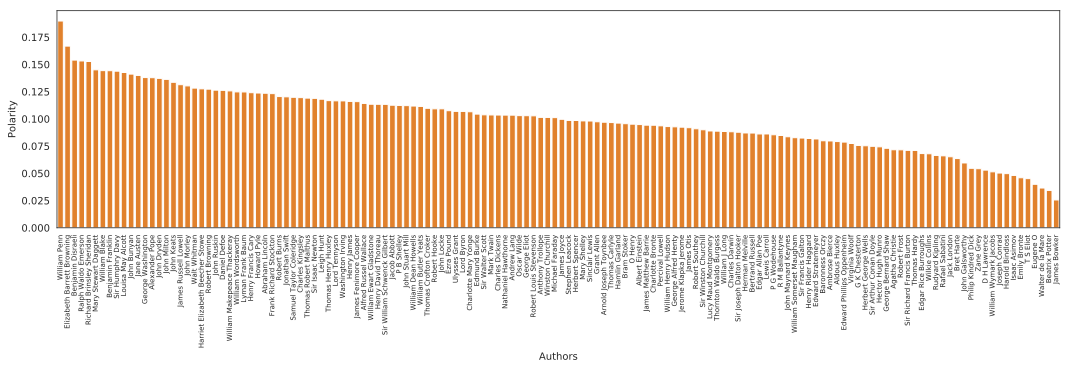

In [37]:
fig, ax = plt.subplots(figsize=[18,4]);
#sns.set(style="whitegrid")
ax.set_xticklabels(gp1['author_name'],rotation=90, fontsize=7)
#ax.set_yticklabels(labels=)
ax = sns.barplot(x="author_name", y="polarity", data=gp1, color ='tab:orange');
plt.xlabel("Authors")
plt.ylabel("Polarity")
plt.savefig('../images/polarity_2.svg', format='png',transparent=True )

In [39]:
gp2 = df.groupby(['author_name']).mean().sort_values(by='subjectivity',ascending=False).reset_index()
# send to csv for presentation
gp2.to_csv('../images/subjectivity.csv')

In [33]:
gp2.head()

,author_name,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Richard Brinsley Sheridan,23913.400000,2473.200000,9.511750,0.152643,0.555538
1,Sir William Schwenck Gilbert,23130.000000,1212.000000,19.387336,0.113313,0.547260
2,William Penn,15500.500000,401.500000,37.964090,0.189838,0.544555
3,Elizabeth Barrett Browning,65227.571429,3359.428571,18.194058,0.166804,0.543689
4,Jane Austen,97997.625000,4334.000000,23.199268,0.139894,0.534898


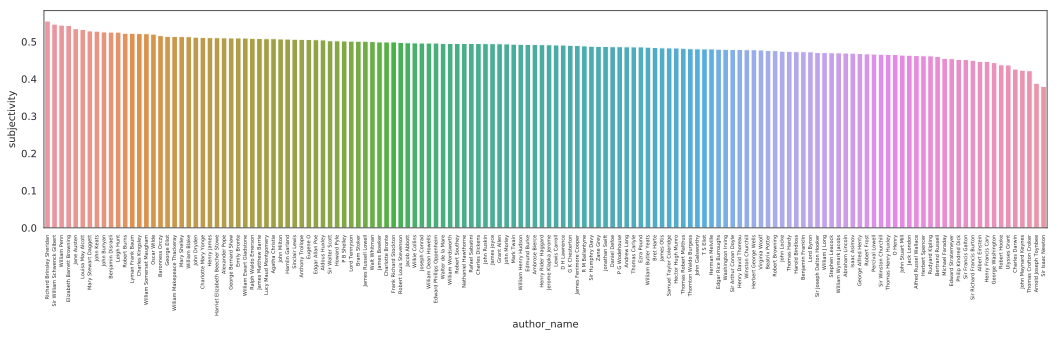

In [34]:
fig, ax = plt.subplots(figsize=[18,4])
#sns.set(style="whitegrid")
ax.set_xticklabels(gp2['author_name'],rotation=90, fontsize=5)
ax = sns.barplot(x="author_name", y="subjectivity", data=gp2)

In [41]:
gp3 = df.groupby(['author_name']).mean().sort_values(by='sentence_length',ascending=False).reset_index()
gp3.head()

# send to csv for presentation
gp3.to_csv('../images/length.csv')

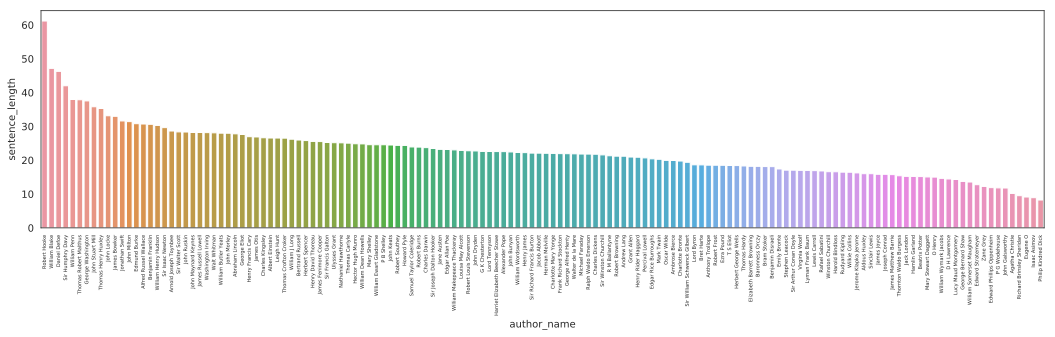

In [42]:
fig, ax = plt.subplots(figsize=[18,4])
#sns.set(style="whitegrid")
ax.set_xticklabels(gp2['author_name'],rotation=90, fontsize=5)
ax = sns.barplot(x="author_name", y="sentence_length", data=gp3)